In [1]:
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
passageiros = pd.read_csv("database-project-03.csv")
passageiros

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [3]:
mpl.rcParams["figure.figsize"] = (10,6)
mpl.rcParams["font.size"] = 14

<Axes: xlabel='tempo', ylabel='passageiros'>

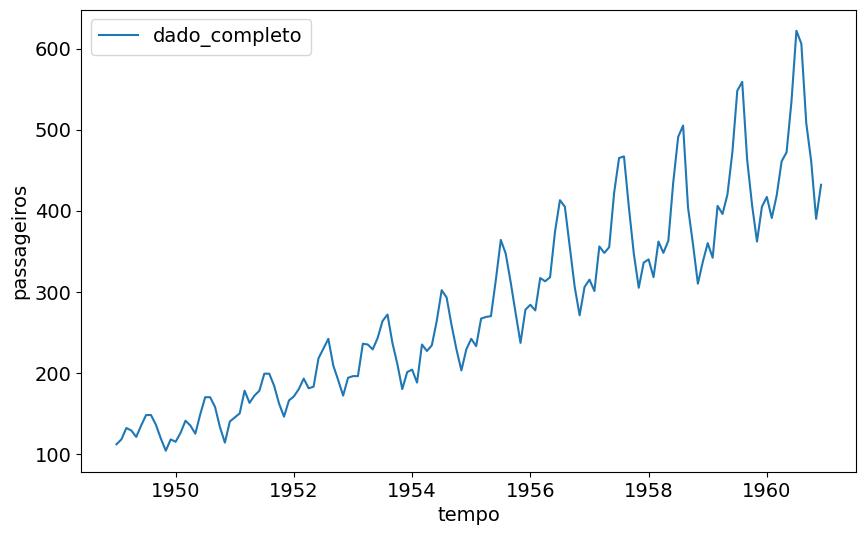

In [4]:
sns.lineplot(x= "tempo", y= "passageiros", data=passageiros, label="dado_completo")

In [5]:
sc = StandardScaler()
sc.fit(passageiros)
dado_escalado = sc.transform(passageiros)

In [6]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

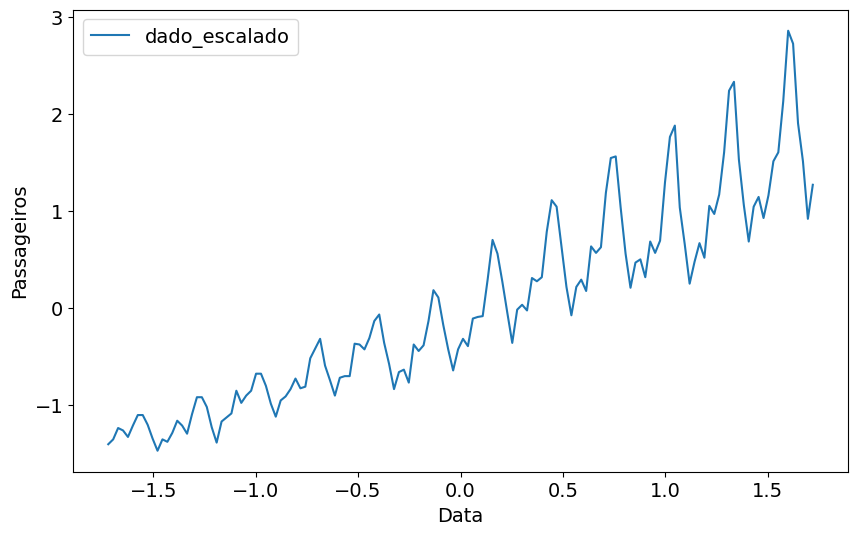

In [7]:
sns.lineplot(x=x, y=y, label = "dado_escalado")
plt.ylabel("Passageiros")
plt.xlabel("Data")

In [8]:
poporcao_dados_para_treino = 0.9
tamanho_treino = int(len(passageiros)*poporcao_dados_para_treino)
tamanho_teste = len(passageiros) - tamanho_treino
print(f"Dados totais: {len(passageiros)} | Taxa de dados para treino: {poporcao_dados_para_treino*100:.2f}% | Dados para treino: {tamanho_treino} | Dados para teste: {tamanho_teste}")

Dados totais: 144 | Taxa de dados para treino: 90.00% | Dados para treino: 129 | Dados para teste: 15


In [9]:
xtreino = x[:tamanho_treino]
ytreino = y[:tamanho_treino]
print(f"X para treino: {len(xtreino)} | Y para treino: {len(ytreino)}")

X para treino: 129 | Y para treino: 129


In [10]:
xteste = x[tamanho_treino:]
yteste = y[tamanho_treino:]
print(f"X para teste: {len(xteste)} | Y para teste: {len(yteste)}")

X para teste: 15 | Y para teste: 15


Text(0.5, 0, 'Data')

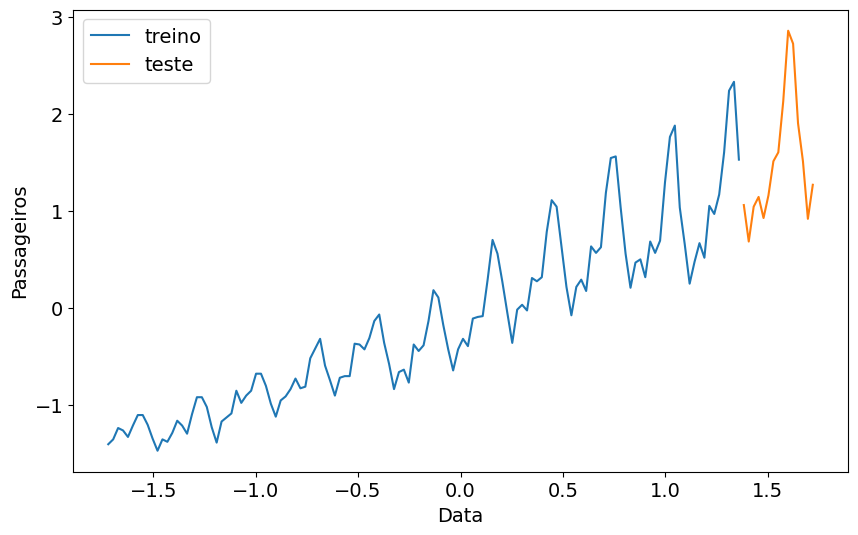

In [11]:
sns.lineplot(x=xtreino, y=ytreino, label="treino")
sns.lineplot(x=xteste, y=yteste, label="teste")
plt.ylabel("Passageiros")
plt.xlabel("Data")

In [12]:
regressor = keras.Sequential()
regressor.add(keras.layers.Dense(1, input_dim= 1, kernel_initializer= "Ones", activation= "linear", use_bias= False))

In [13]:
regressor.compile(loss="mean_squared_error", optimizer="adam")

In [14]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 0s 3ms/step - loss: 0.1284


In [16]:
y_predict = regressor.predict(xtreino)
y_predict

5/5 [==============================] - 0s 2ms/step


array([[-1.712449  ],
       [-1.6884987 ],
       [-1.6645483 ],
       [-1.640598  ],
       [-1.6166476 ],
       [-1.5926974 ],
       [-1.5687469 ],
       [-1.5447966 ],
       [-1.5208464 ],
       [-1.4968959 ],
       [-1.4729457 ],
       [-1.4489952 ],
       [-1.425045  ],
       [-1.4010947 ],
       [-1.3771442 ],
       [-1.353194  ],
       [-1.3292435 ],
       [-1.3052933 ],
       [-1.281343  ],
       [-1.2573926 ],
       [-1.2334423 ],
       [-1.209492  ],
       [-1.1855416 ],
       [-1.1615912 ],
       [-1.137641  ],
       [-1.1136906 ],
       [-1.0897403 ],
       [-1.0657899 ],
       [-1.0418396 ],
       [-1.0178893 ],
       [-0.9939389 ],
       [-0.9699886 ],
       [-0.94603825],
       [-0.92208797],
       [-0.89813757],
       [-0.87418723],
       [-0.8502369 ],
       [-0.82628655],
       [-0.8023363 ],
       [-0.77838594],
       [-0.7544356 ],
       [-0.7304852 ],
       [-0.70653486],
       [-0.6825845 ],
       [-0.65863425],
       [-0

<Axes: >

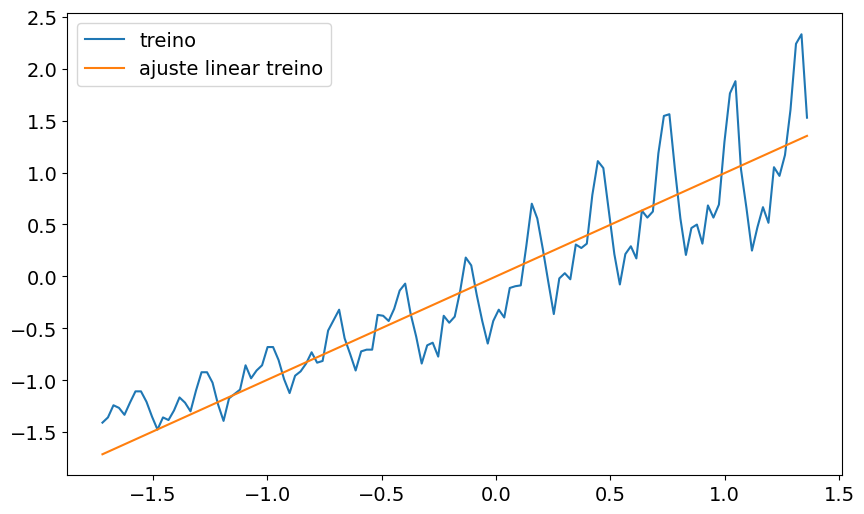

In [17]:
sns.lineplot(x=xtreino, y=ytreino, label="treino")
sns.lineplot(x=xtreino, y=y_predict[:,0], label="ajuste linear treino")

In [18]:
d = {"tempo": xtreino, "passageiros": y_predict[:,0]}
resultados = pd.DataFrame(data=d)
resultados_transf = sc.inverse_transform(resultados)
resultados_transf = pd.DataFrame(resultados_transf)
resultados_transf.columns = ["tempo", "passageiros"]
resultados_transf.head()

,tempo,passageiros
0,1949.000000,75.576980
1,1949.083333,78.440206
2,1949.166667,81.303460
3,1949.250000,84.166686
4,1949.333333,87.029940


<Axes: xlabel='tempo', ylabel='passageiros'>

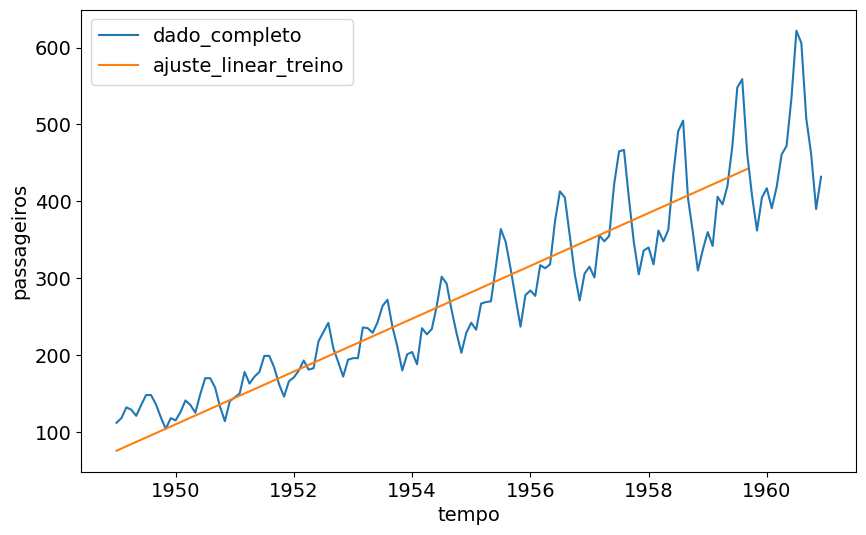

In [19]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")
sns.lineplot(x="tempo", y="passageiros", data=resultados_transf, label="ajuste_linear_treino")

In [20]:
y_predict_teste = regressor.predict(xteste)
y_predict_teste

1/1 [==============================] - 0s 32ms/step


array([[1.3771442],
       [1.4010947],
       [1.425045 ],
       [1.4489952],
       [1.4729457],
       [1.4968959],
       [1.5208464],
       [1.5447966],
       [1.5687469],
       [1.5926974],
       [1.6166476],
       [1.640598 ],
       [1.6645483],
       [1.6884987],
       [1.712449 ]], dtype=float32)

In [21]:
d = {"tempo": xteste, "passageiros": y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)
resultados_transf_teste = sc.inverse_transform(resultados_teste)
resultados_transf_teste = pd.DataFrame(resultados_transf_teste)
resultados_transf_teste.columns = ["tempo", "passageiros"]
resultados_transf_teste.head()

,tempo,passageiros
0,1959.750000,444.934882
1,1959.833333,447.798137
2,1959.916667,450.661377
3,1960.000000,453.524602
4,1960.083333,456.387857


<Axes: xlabel='tempo', ylabel='passageiros'>

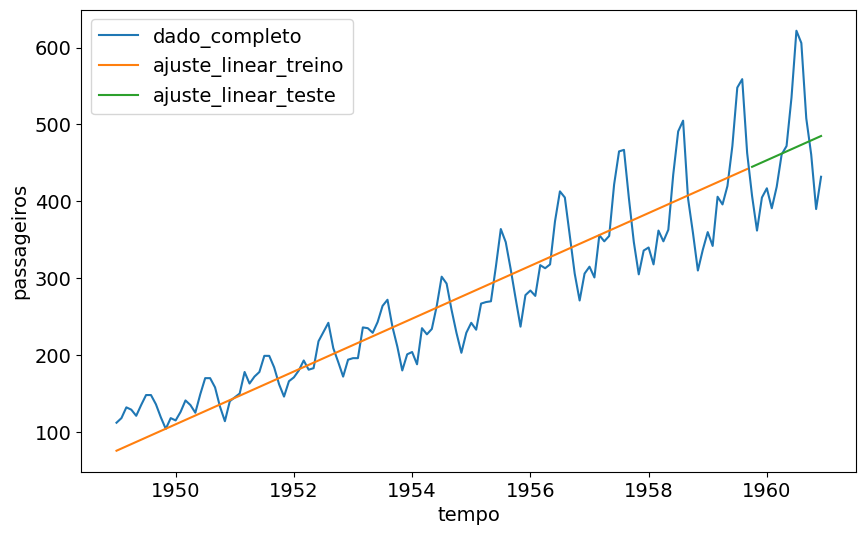

In [22]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")
sns.lineplot(x="tempo", y="passageiros", data=resultados_transf, label="ajuste_linear_treino")
sns.lineplot(x="tempo", y="passageiros", data=resultados_transf_teste, label="ajuste_linear_teste")

In [23]:
regressor2 = keras.Sequential()
regressor2.add(keras.layers.Dense(8, input_dim=1, kernel_initializer="random_uniform", activation="linear", use_bias=False))
regressor2.add(keras.layers.Dense(8, kernel_initializer="random_uniform", activation="linear", use_bias=False))
regressor2.add(keras.layers.Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

In [24]:
regressor2.compile(loss="mean_squared_error", optimizer="adam")

In [25]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200


5/5 [==============================] - 1s 2ms/step - loss: 0.8092
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8084
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8074
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8058
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8038
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8007
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7964
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7909
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7831
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7735
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7622
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7486
Epoch 13/200
5/5 [==============================] - 0s 2ms/step - loss: 0

In [27]:
y_predict = regressor2.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


In [28]:
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 39ms/step


<Axes: >

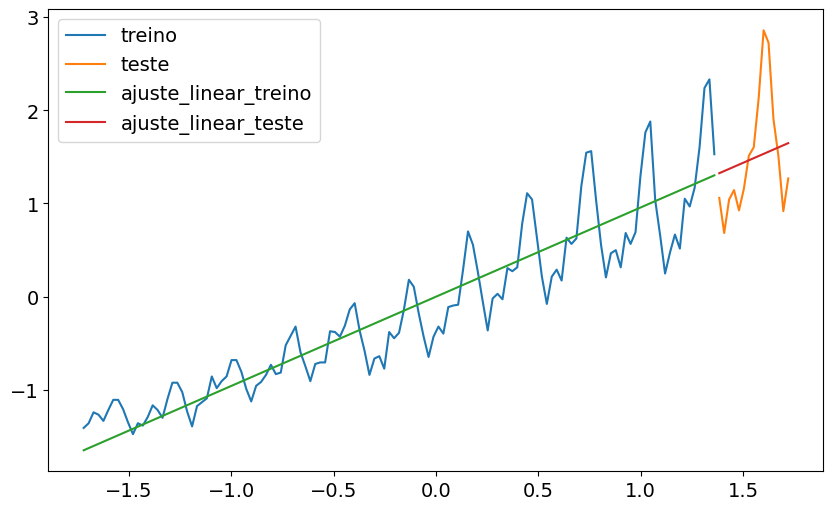

In [29]:
sns.lineplot(x=xtreino, y=ytreino, label="treino")
sns.lineplot(x=xteste, y=yteste, label="teste")
sns.lineplot(x=xtreino, y=y_predict[:,0], label="ajuste_linear_treino")
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label="ajuste_linear_teste")

In [30]:
regressor2 = keras.Sequential()
regressor2.add(keras.layers.Dense(8, input_dim=1, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor2.add(keras.layers.Dense(8, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor2.add(keras.layers.Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

regressor2.compile(loss="mean_squared_error", optimizer="adam")
regressor2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 8)                 64        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
regressor2.fit(xtreino, ytreino, epochs=500)

Epoch 1/500


5/5 [==============================] - 1s 2ms/step - loss: 0.8234
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8159
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8100
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8057
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8022
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8000
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7953
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7928
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7902
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7888
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7877
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7870
Epoch 13/500
5/5 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 29ms/step


<Axes: >

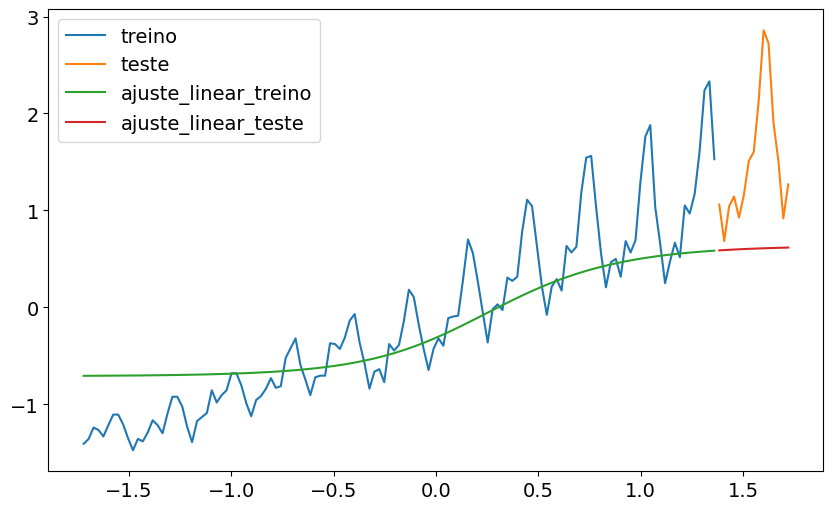

In [32]:
y_predict = regressor2.predict(xtreino)
y_predict_teste = regressor2.predict(xteste)

sns.lineplot(x=xtreino, y=ytreino, label="treino")
sns.lineplot(x=xteste, y=yteste, label="teste")
sns.lineplot(x=xtreino, y=y_predict[:,0], label="ajuste_linear_treino")
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label="ajuste_linear_teste")

Vamos passar os valores de y tanto como entrada quanto como saída. Para isso a entrada deve ser uma série de valores com um atraso ou um deslocamento para trás. Assim vamos passar o valor atual para o modelo e esperar que ele nos diga o valor futuro.  
Mudando os dados para criar esse deslocamento:

In [33]:
vetor = pd.DataFrame(ytreino)[0]
vetor

0     -1.407779
1     -1.357590
2     -1.240483
3     -1.265578
4     -1.332496
         ...   
124    1.168570
125    1.603538
126    2.239260
127    2.331272
128    1.528255
Name: 0, Length: 129, dtype: float64

In [34]:
def separa_dados(vetor, n_passos):
    X_novo, y_novo = [], []

    for i in range (n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo

In [35]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [36]:
xtreino_novo[0:5,0]

array([-1.40777884, -1.35759023, -1.24048348, -1.26557778, -1.33249593])

In [37]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [38]:
vetor2 = pd.DataFrame(yteste)[0]
vetor2

0     1.059828
1     0.683413
2     1.043098
3     1.143475
4     0.925991
5     1.160205
6     1.511525
7     1.603538
8     2.130518
9     2.858253
10    2.724417
11    1.904669
12    1.511525
13    0.917627
14    1.268947
Name: 0, dtype: float64

In [39]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)
xteste_novo[0:5]

array([[1.05982773],
       [0.68341317],
       [1.04309819],
       [1.14347541],
       [0.92599144]])

In [40]:
regressor3 = keras.Sequential()
regressor3.add(keras.layers.Dense(8, input_dim=1, kernel_initializer="ones", activation="linear", use_bias=False))
regressor3.add(keras.layers.Dense(64, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor3.add(keras.layers.Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

regressor3.compile(loss="mean_squared_error", optimizer="adam")
regressor3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 8         
                                                                 
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 1)                 64        
                                                                 
Total params: 584 (2.28 KB)
Trainable params: 584 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100


4/4 [==============================] - 1s 4ms/step - loss: 1.1040
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9547
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8556
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7750
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7367
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7121
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6891
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6770
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6595
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6406
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6196
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5967
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 57ms/step


<Axes: xlabel='tempo', ylabel='0'>

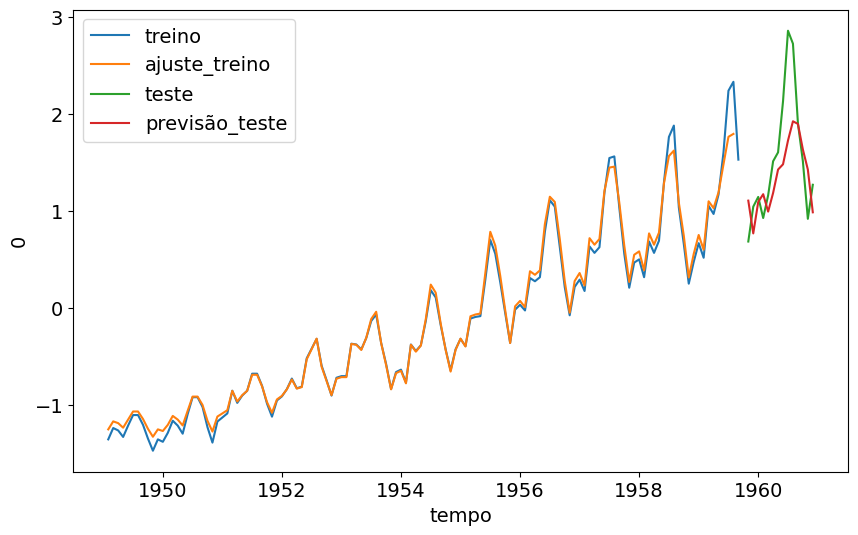

In [42]:
y_predict_novo = regressor3.predict(xtreino_novo)
y_predict_teste_novo = regressor3.predict(xteste_novo)

sns.lineplot(x="tempo", y= ytreino_novo, data=passageiros[1:129], label="treino")
sns.lineplot(x="tempo", y= pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label="ajuste_treino")
sns.lineplot(x="tempo", y= yteste_novo, data=passageiros[130:144], label="teste")
sns.lineplot(x="tempo", y= y_predict_teste_novo[:,0], data=passageiros[130:144], label="previsão_teste")

In [43]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 4)

In [44]:
# Utilizando um array com 4 elementos em cada posicão em X para treinar um novo ponto de Y
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [45]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [46]:
xteste_novo, yteste_novo = separa_dados(vetor2, 4)

In [47]:
xteste_novo[0:5]

array([[1.05982773, 0.68341317, 1.04309819, 1.14347541],
       [0.68341317, 1.04309819, 1.14347541, 0.92599144],
       [1.04309819, 1.14347541, 0.92599144, 1.16020494],
       [1.14347541, 0.92599144, 1.16020494, 1.5115252 ],
       [0.92599144, 1.16020494, 1.5115252 , 1.60353765]])

In [48]:
yteste_novo[0:5]

array([0.92599144, 1.16020494, 1.5115252 , 1.60353765, 2.13051803])

In [49]:
regressor4 = keras.Sequential()
regressor4.add(keras.layers.Dense(16, input_dim=4, kernel_initializer="ones", activation="linear", use_bias=False))
regressor4.add(keras.layers.Dense(128, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor4.add(keras.layers.Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

regressor4.compile(loss="mean_squared_error", optimizer="adam")
regressor4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                64        
                                                                 
 dense_11 (Dense)            (None, 128)               2048      
                                                                 
 dense_12 (Dense)            (None, 1)                 128       
                                                                 
Total params: 2240 (8.75 KB)
Trainable params: 2240 (8.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=5000)

Epoch 1/5000


4/4 [==============================] - 1s 2ms/step - loss: 0.6348
Epoch 2/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.4044
Epoch 3/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2701
Epoch 4/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1795
Epoch 5/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1471
Epoch 6/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 7/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1573
Epoch 8/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1587
Epoch 9/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1537
Epoch 10/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1476
Epoch 11/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1410
Epoch 12/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1413
Epoch 13/5000
4/4 [==============================] - 0s 3ms/st

1/1 [==============================] - 0s 29ms/step


<Axes: xlabel='tempo'>

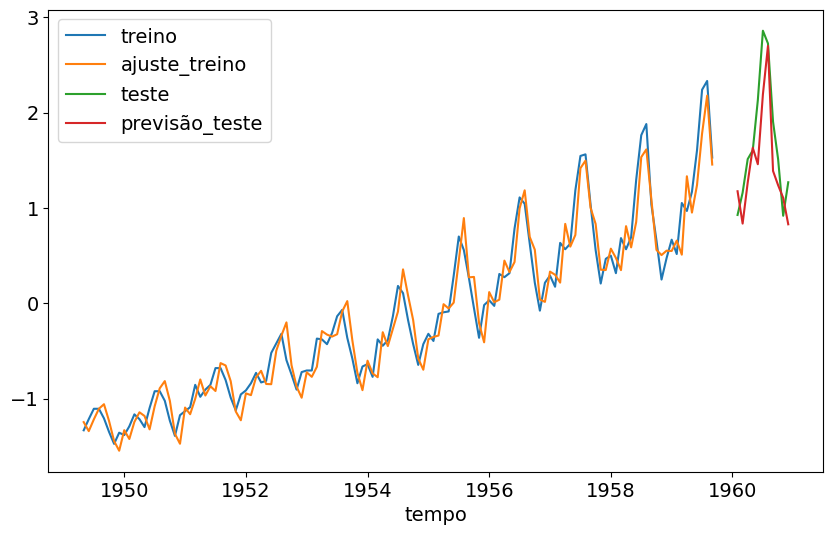

In [51]:
y_predict_novo = regressor4.predict(xtreino_novo)
y_predict_teste_novo = regressor4.predict(xteste_novo)

sns.lineplot(x="tempo", y= ytreino_novo, data=passageiros[4:129], label="treino")
sns.lineplot(x="tempo", y= y_predict_novo[:,0], data=passageiros[4:129], label="ajuste_treino")
sns.lineplot(x="tempo", y= yteste_novo, data=passageiros[133:144], label="teste")
sns.lineplot(x="tempo", y= y_predict_teste_novo[:,0], data=passageiros[133:144], label="previsão_teste")